In [66]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [67]:
# from prepaered dataFrame1
path_to_data_frame = 'step_1_lesson_7.csv'
df = pd.read_csv(path_to_data_frame)

<AxesSubplot:xlabel='date', ylabel='visits'>

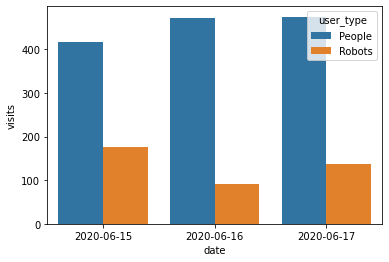

In [68]:
# Build a graph with the distribution of the number of visits from bots and regular users of the Yandex.Metrica website
sns.barplot(x="date", y="visits", data=df, hue='user_type')

In [69]:
# from prepared dataFrame2
path_to_data_frame = 'step_2_lesson_7.csv'
df = pd.read_csv(path_to_data_frame)

In [70]:
# Determine the percentage of visits to the Yandex.Metrica website from the Google Chrome browser
round((df.query('browser == "Google Chrome"').visits.sum() / df.visits.sum()) * 100, 0)

60.0

In [71]:
# from prepared dataFrame3
path_to_data_frame = 'step_3_lesson_7.csv'
df = pd.read_csv(path_to_data_frame)

In [52]:
# determine which browser has the largest share of site visits by bots from the total number of visits in this browser?
category_visits = df.groupby(['browser', 'user_type'], as_index=False) \
            .agg({'visits': 'sum'}) \
            .pivot(index='browser', columns='user_type', values='visits') \
            .reset_index()
category_visits = category_visits.fillna(0)
category_visits['Robots_proportion'] = category_visits.Robots / (category_visits.People + category_visits.Robots)
category_visits.iloc[category_visits.Robots_proportion.idxmax()]

user_type
browser              UCWEB
People                 0.0
Robots                 4.0
Robots_proportion      1.0
Name: 11, dtype: object

In [116]:
# Create a column with a metric for the share of visits to the site for each of these cuts

In [117]:
# from prepared dataFrame4
path_to_data_frame = 'step_4_lesson_7.csv'
df = pd.read_csv(path_to_data_frame)

In [118]:
prepared_df = df.groupby(['date', 'browser', 'user_type'], as_index=False).agg({'visits': 'sum'})
total_number_in_date = int(prepared_df.groupby('date', as_index=False) \
                .agg({'visits': 'sum'}) \
                .loc[prepared_df.date == '2020-06-15'].visits)
prepared_df['proportion'] = prepared_df['visits'].div(total_number_in_date)

In [119]:
round(prepared_df.loc[(prepared_df.browser == 'Safari') & (prepared_df.user_type == 'People')].proportion * 100, 1)

15    3.2
Name: proportion, dtype: float64

In [137]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [138]:
# How many visits per unique user are made by bots from the Google Chrome browser
merged_df = df.merge(prepared_df, on=['date', 'browser', 'user_type'], how='inner')
merged_df['visits_by_users'] = merged_df.visits / merged_df.users
merged_df.loc[(merged_df.browser == 'Google Chrome') & (merged_df.user_type == 'Robots')].visits_by_users

1    1.0
Name: visits_by_users, dtype: float64